In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import skew

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 15)

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df[df["survived"] == 1].shape

(342, 15)

In [ ]:
df[df["survived"] == 0].shape

(549, 15)

In [ ]:
print(df['class'].unique())
print(df['class'].nunique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
3


In [ ]:
analysis_of_class = df.groupby('class')['age'].describe().transpose()
analysis_of_class

class,First,Second,Third
count,186.000000,173.000000,355.000000
mean,38.233441,29.877630,25.140620
std,14.802856,14.001077,12.495398
min,0.920000,0.670000,0.420000
25%,27.000000,23.000000,18.000000
50%,37.000000,29.000000,24.000000
75%,49.000000,36.000000,32.000000
max,80.000000,70.000000,74.000000


In [ ]:
#checking for the null values in age column of daataframe
import pandas as pd
nullrows = df.loc[df["age"].isnull()]
print(nullrows)
print(nullrows.dtypes)

     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
5           0       3    male  NaN      0      0   8.4583        Q   Third   
17          1       2    male  NaN      0      0  13.0000        S  Second   
19          1       3  female  NaN      0      0   7.2250        C   Third   
26          0       3    male  NaN      0      0   7.2250        C   Third   
28          1       3  female  NaN      0      0   7.8792        Q   Third   
..        ...     ...     ...  ...    ...    ...      ...      ...     ...   
859         0       3    male  NaN      0      0   7.2292        C   Third   
863         0       3  female  NaN      8      2  69.5500        S   Third   
868         0       3    male  NaN      0      0   9.5000        S   Third   
878         0       3    male  NaN      0      0   7.8958        S   Third   
888         0       3  female  NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
5      

In [ ]:
df['age'].dtype

dtype('float64')

In [ ]:
# filling the na values with the mean values with respect to their classes(First, Second, Third)

condition = (pd.isna(df['age'])) & (df['class'] == 'First')
mean_value = df.loc[df['class'] == 'First', 'age'].mean()
df.loc[condition, 'age'] = mean_value

condition = (pd.isna(df['age'])) & (df['class'] == 'Second')
mean_value = df.loc[df['class'] == 'Second', 'age'].mean()
df.loc[condition, 'age'] = mean_value

condition = (pd.isna(df['age'])) & (df['class'] == 'Third')
mean_value = df.loc[df['class'] == 'Third', 'age'].mean()
df.loc[condition, 'age'] = mean_value

In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
for class_label in df['class'].unique():
  class_data = df[df['class'] == class_label]
  print(class_data.shape)

(491, 15)
(216, 15)
(184, 15)


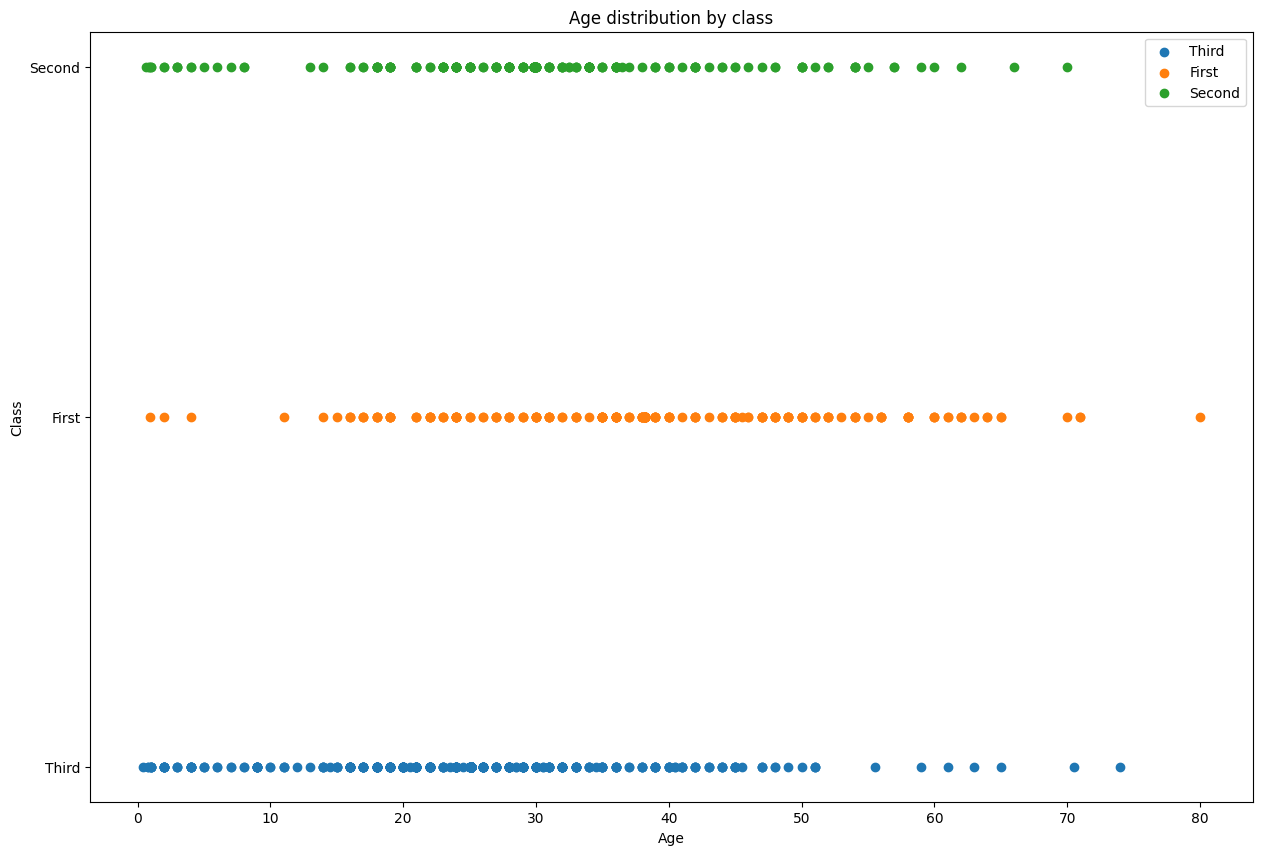

In [ ]:
plt.figure(figsize = (15, 10))
for class_label in df['class'].unique():
  class_data = df[df['class'] == class_label]
  plt.scatter(class_data['age'], [class_label] * len(class_data), label=class_label)
  # plt.hist(class_data['age'], [class_label] * len(class_data), label=class_label)

plt.xlabel('Age')
plt.ylabel('Class')
plt.title('Age distribution by class')
plt.legend()
plt.show()


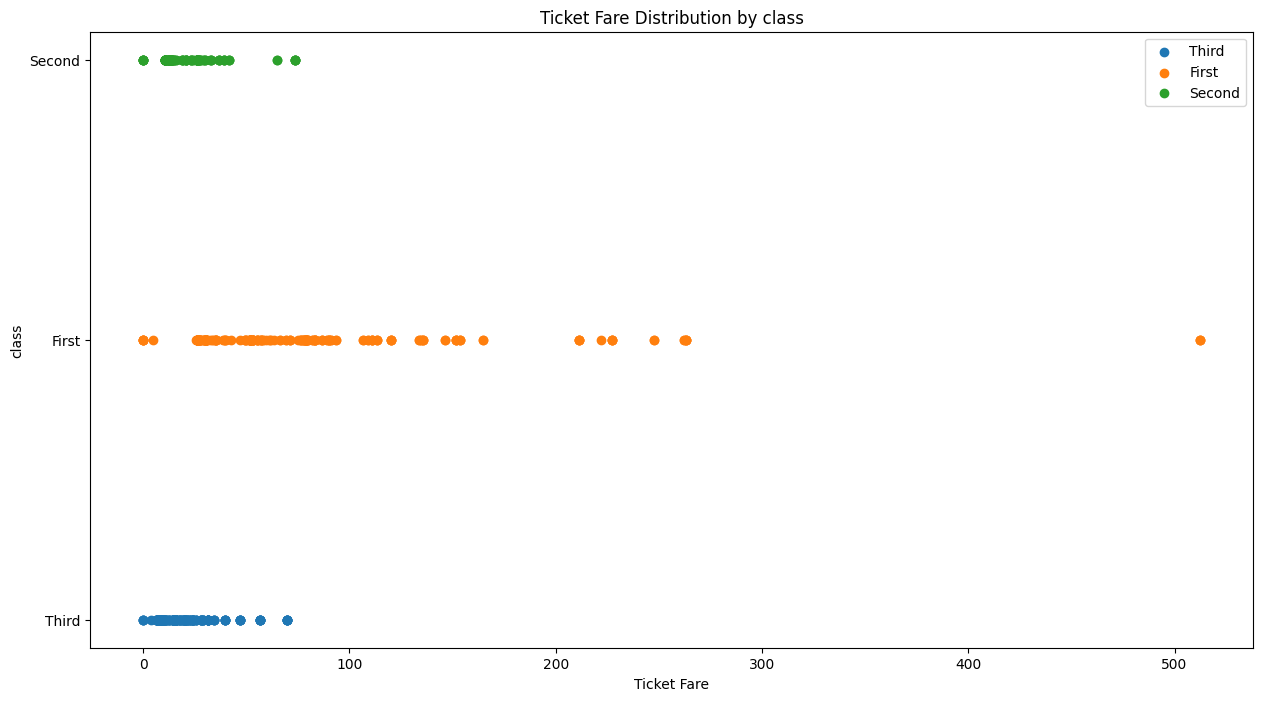

In [ ]:
plt.figure(figsize=(15, 8))

for class_label in df['class'].unique():
  class_data = df[df['class'] == class_label]
  plt.scatter(class_data['fare'], [class_label] * len(class_data), label = class_label)

plt.xlabel('Ticket Fare')
plt.ylabel('class')
plt.title('Ticket Fare Distribution by class')
plt.legend()
plt.show()

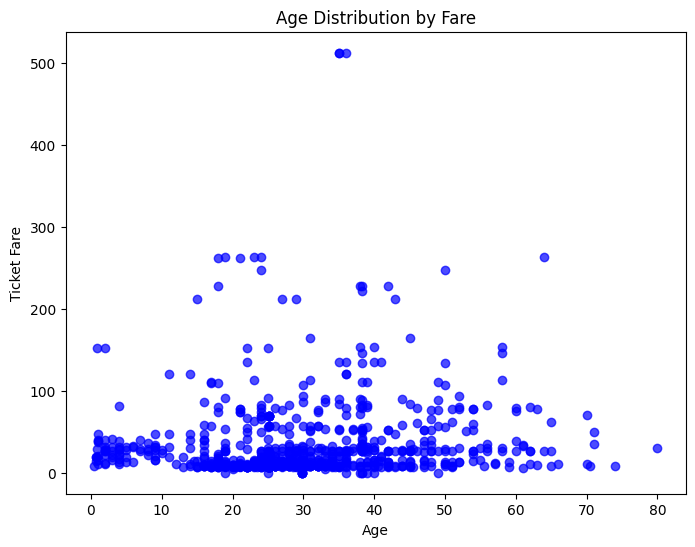

In [ ]:
plt.figure(figsize = (8, 6))

plt.scatter(df['age'], df['fare'], color = 'blue', alpha = 0.7)

plt.xlabel('Age')
plt.ylabel('Ticket Fare')
plt.title('Age Distribution by Fare')
plt.show()


In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["age_category"] = label_encoder.fit_transform(df["age"])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_category
0,0,3,male,22.00000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,LabelEncoder()
1,1,1,female,38.00000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,LabelEncoder()
2,1,3,female,26.00000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,LabelEncoder()
3,1,1,female,35.00000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,LabelEncoder()
4,0,3,male,35.00000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,LabelEncoder()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,LabelEncoder()
887,1,1,female,19.00000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,LabelEncoder()
888,0,3,female,25.14062,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,LabelEncoder()
889,1,1,male,26.00000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,LabelEncoder()


In [ ]:
# 1 February 2024

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop(["alive"], axis="columns")
y = df["alive"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()